In [1]:
# this enable automatic reloading of libraries
%load_ext autoreload
%autoreload 2

from clib.bellhop import *
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
s = bellhop({'mediterrannee': './SSP_4profils.mat'},name='cognac_2000m_test',rmax=50.)
s.params

{'name': 'cognac_2000m_test',
 'freq': 3000.0,
 'zs': 100.0,
 'zmin': 0.0,
 'zmax': 2550.0,
 'rmin': 0.0,
 'rmax': 50.0,
 'NDepth': 2551.0,
 'NRange': 5001.0,
 'ALimites': [-15.0, 15.0],
 'bottom': 1600.0,
 'file_type': 'R',
 'file_bathy': 'cognac_2000m_test.bty',
 'file_env': 'cognac_2000m_test.env',
 'file_ssp': 'cognac_2000m_test.ssp'}

# Choix du profil de célérité

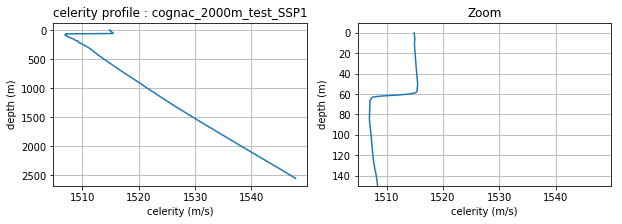

In [3]:
issp=0                                 # sound speed profile number
s.plotssp('mediterrannee', Issp=issp)

In [4]:
# Generate .env file R

s.params['file_type'] = 'R'           # ray tracing (.ray)
s.params['zs'] = 100.                 # source depth
s.params['ALimites'] = [-15.0, 15.0]  # limit angles         

s.generate_envfile('mediterrannee', file_env = s.params['name']+'_R.env', Issp=issp, SSP_depth_step=50)


Output file is : cognac_2000m_test_R.env


# Eigenray plots 

In [5]:
# Generate .env file E

issp=0                                # sound speed profile number

s.params['file_type'] = 'E'           # 'E' : eigen rays (.rau) / 'A' : arrivals time and amplitude file (.arr)
s.params['zs'] = 100.                 # source depth
s.params['ALimites'] = [-90.0, 90.0]  # limit angles

s.params['NDepth'] = 1                # number of receiver depths
s.params['zmin'] = 500.               # minimum depth (m)
s.params['zmax'] = 1500.              # maximum depth (m) (unuseful if NDepth=1)
                 

s.params['NRange'] = 1                # number of receiver range    
s.params['rmin'] = 10.                # minimum range (km)
s.params['rmax'] = 30.                # maximum range (km) (unuseful if NRange=1)            


s.generate_envfile('mediterrannee', file_env = s.params['name']+'_E.env', Issp=issp, SSP_depth_step=50)


Output file is : cognac_2000m_test_E.env


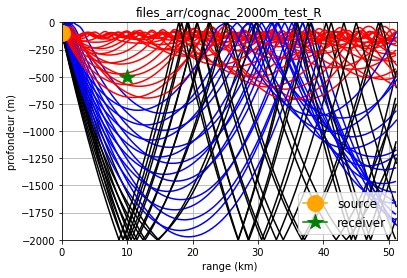

In [6]:
# ray tracing + location of source and receiver 
s.plotray('files_arr/cognac_2000m_test_R.ray')

plt.plot (0., -s.params['zs'], color='orange', marker='o', markersize=16, label = 'source')
plt.plot (s.params['rmin'], -s.params['zmin'], color='green', marker='*', markersize=16, label = 'receiver')
plt.legend(loc = 4, fontsize = 12)

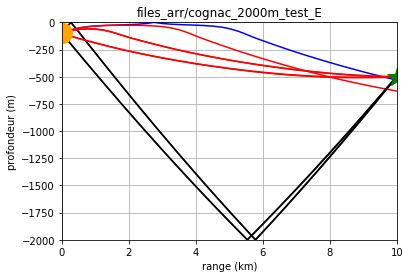

In [7]:
# eigenray plot
s.plotray('files_arr/cognac_2000m_test_E.ray')

plt.plot (0., -s.params['zs'], color='orange', marker='o', markersize=20, label = 'source')
plt.plot (s.params['rmin'], -s.params['zmin'], color='green', marker='*', markersize=20, label = 'receiver')

# Arrivals calculations

In [8]:
# Generate .env file A

issp=0                                # sound speed profile number

s.params['file_type'] = 'A'           # 'E' : eigen rays (.rau) / 'A' : arrivals time and amplitude file (.arr)
s.params['zs'] = 100.                 # source depth
s.params['ALimites'] = [-90.0, 90.0]  # limit angles

s.params['NDepth'] = 1                # number of receiver depths
s.params['zmin'] = 500.               # minimum depth (m)
s.params['zmax'] = 1500.              # maximum depth (m) (unuseful if NDepth=1)
                 

s.params['NRange'] = 1                # number of receiver range    
s.params['rmin'] = 10.                # minimum range (km)
s.params['rmax'] = 30.                # maximum range (km) (unuseful if NRange=1)            


s.generate_envfile('mediterrannee',file_env = s.params['name']+'_A.env', Issp=issp, SSP_depth_step=50)

Output file is : cognac_2000m_test_A.env


Max.number of arrivals for source index 0 is 6


(6.62, 6.625)

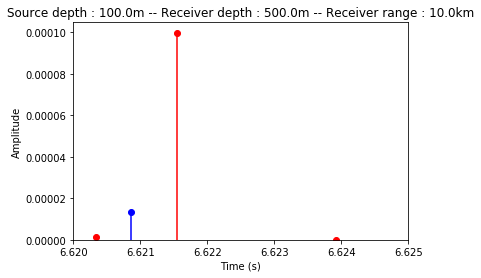

In [20]:
irr = 0    # choice of receiver range (size of NRange)
ird = 0    # choice of receiver depth (size of NDepth)
isd = 0    # choice of source depth   

s.plotarr('files_arr/cognac_2000m_test_A.arr', irr, ird, isd)
plt.xlim (xmin = 6.620, xmax = 6.625)

In [10]:
# arrays with amplitude and time 

Arr, Pos = s.read_arrivals_asc ('files_arr/cognac_2000m_test_A.arr')
Narr = int(Arr['Narr'][irr, ird, isd])

A = abs(Arr['A'][irr, :Narr, ird, isd])
t = Arr['delay'][irr, :Narr, ird, isd]

print ('\nAmplitude :', A)
print ('\nTime :', t)


Max.number of arrivals for source index 0 is 6

Amplitude : [5.34131144e-05 1.35860237e-05 1.28224224e-06 7.13797603e-21
 9.97282914e-05 5.91352240e-05]

Time : [6.97612238 6.62086439 6.62034273 6.62391758 6.6215477  6.93277168]


In [15]:
# error (dx) on distance if amplitude max is used instead of first arrival   

t_max = t[np.where(A==np.max(A))]   # time of arrival of max of amplitude
t0 = np.min(t)                      # time of first arrival
dt = t_max - t0
c = 1500                            # celerity (m/s)
dx = c * dt
print('Error on distance : dx = %.2fm' %dx)

Error on distance : dx = 1.81m


# Do we have to change Amplitude unit in dB ?? 

In [10]:
irr = 0    # choice of receiver range (size of NRange)
ird = 0    # choice of receiver depth (size of NDepth)
isd = 0    # choice of source depth  

Arr, Pos = s.read_arrivals_asc ('files_arr/cognac_2000m_test_A.arr', Narrmx = 200)

Narr = int(Arr['Narr'][irr, ird, isd])

Amp = abs(Arr['A'][irr, :Narr, ird, isd])
print('\nAmplitude : \n', Amp)

db = -20.0 * np.log10 (Amp) 
print('\nEn dB : \n', db)

Max.number of arrivals for source index 0 is 6

Amplitude : 
 [5.34131144e-05 1.35860237e-05 1.28224224e-06 7.13797603e-21
 9.97282914e-05 5.91352240e-05]

En dB : 
 [ 85.44704197  97.33815264 117.84059841 402.9284983   80.02363243
  84.56307507]


# Full calculations on this Mediterrannée profile 

- *Bathymetry* : flat bottom at 2000 m depth

- *Source* : one source at 100m depth at range 0km

- *Receivers* : **Depth** : every 1m from 0 to 500m depth    /    **Range** : every 10m from 0 to 10 km 


In [19]:
# Generate .env file A

issp=0                                # sound speed profile number

s.params['file_type'] = 'A'           # 'E' : eigen rays (.rau) / 'A' : arrivals time and amplitude file (.arr)
s.params['zs'] = 100.                 # source depth
s.params['ALimites'] = [-90.0, 90.0]  # limit angles

s.params['NDepth'] = 501              # number of receiver depths
s.params['zmin'] = 0.                 # minimum depth (m)
s.params['zmax'] = 500.               # maximum depth (m) (unuseful if NDepth=1)
                 

s.params['NRange'] = 10001            # number of receiver range    
s.params['rmin'] = 0.                 # minimum range (km)
s.params['rmax'] = 100.               # maximum range (km) (unuseful if NRange=1)            


s.generate_envfile('mediterrannee',file_env = s.params['name']+'_A_full.env', Issp=issp, SSP_depth_step=10)

# Caution ! change step box (0, 2500, 101). Function to improve.

Output file is : cognac_2000m_test_A_full.env


In [ ]:
# waiting for results